# LOAN PREDICTION --- CLASSIFICATION

<div style="text-align: center;">
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQIkqewCEtTvvOStWpryRD6b_9UiS-RXbXU9w&usqp=CAU"  width=600>
</div>

## Import libraries

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from termcolor import colored

import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)
pd.set_option("display.width",600)
pd.set_option('display.float_format', lambda x: '%.5f' % x) 

from sklearn.impute import KNNImputer
import miceforest as mf
from sklearn.preprocessing import normalize,scale
from sklearn.decomposition import PCA

from pycaret.classification import*

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load and EDA

In [2]:
df = pd.read_csv("LoansTrainingSet.csv")
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.00000,10+ years,Home Mortgage,33694.00000,Debt Consolidation,$584.03,12.30000,41.00000,10,0,6760,16056,0.00000,0.00000
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.00000,4 years,Home Mortgage,42269.00000,other,"$1,106.04",26.30000,NaN,17,0,6262,19149,0.00000,0.00000
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.00000,10+ years,Home Mortgage,90126.00000,Debt Consolidation,"$1,321.85",28.80000,NaN,5,0,20967,28335,0.00000,0.00000
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.00000,10+ years,Own Home,38072.00000,Debt Consolidation,$751.92,26.20000,NaN,9,0,22529,43915,0.00000,0.00000
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.00000,4 years,Rent,50025.00000,Debt Consolidation,$355.18,11.50000,NaN,12,0,17391,37081,0.00000,0.00000


In [3]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.90000,NaN,16,0,43992,44080,0.00000,0.00000
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.00000,10+ years,Own Home,77186.00000,Debt Consolidation,"$1,376.47",19.10000,47.00000,9,0,1717,9758,0.00000,0.00000
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.00000,9 years,Home Mortgage,52504.00000,Debt Consolidation,$297.96,15.10000,82.00000,8,0,3315,20090,0.00000,0.00000
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.00000,9 years,Home Mortgage,52504.00000,Debt Consolidation,$297.96,15.10000,82.00000,8,0,3315,20090,0.00000,0.00000
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.00000,10+ years,Home Mortgage,117480.00000,Debt Consolidation,"$2,525.82",18.00000,11.00000,10,0,28317,62371,0.00000,0.00000


In [4]:
def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(70, '*'))
    print('Observations -------> {}'.format(df.shape[0]))
    print('Features     -------> {}'.format(df.shape[1]))
    print(f"Shape of dataset: {colored(df.shape, 'red')}")
    print(" TYPES OF FEATURES ".center(70, '*'))
    print(df.dtypes,"\n")
    print(" INFO ".center(70, "*"))
    print("\n",df.info(),"\n")
    print(' DUPLICATE VALUE ANALYSIS '.center(70, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print(" QUANTILES ".center(70, '*'))
    numerical_df = df.select_dtypes(include=["number"])
    print(numerical_df.quantile([0, 0.05, 0.50, 0.95, 0.90, 1]).T, "\n")
    print(" MISSING VALUES ".center(70, "*"))
    print(df.isnull().sum())

check_df(df)

******************************* SHAPE ********************************
Observations -------> 256984
Features     -------> 19
Shape of dataset: (256984, 19)
************************* TYPES OF FEATURES **************************
Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                     object
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit              object
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [5]:
## Thus we found number of unique values of all columns with this function 
def check_unique(df):

  dict = {}
  for i in list(df.columns):
    dict[i] = df[i].nunique()
  nunq = pd.DataFrame(dict,index=["Number of Unique"]).transpose().sort_values(by="Number of Unique",ascending=False)
  return nunq
check_unique(df)  



,Number of Unique
Loan ID,215700
Customer ID,215700
Monthly Debt,129115
Maximum Open Credit,87188
Annual Income,60558
Current Credit Balance,45704
Current Loan Amount,27347
Years of Credit History,541
Credit Score,334
Months since last delinquent,131


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,256984.00000,13713306.26024,34381306.56938,505.00000,8299.00000,14298.00000,24367.00000,99999999.00000
Credit Score,195308.00000,1251.11610,1762.01685,585.00000,714.00000,733.00000,744.00000,7510.00000
Annual Income,195308.00000,71952.71619,58877.57462,0.00000,44321.00000,61242.00000,86462.00000,8713547.00000
Years of Credit History,256984.00000,18.29019,7.07575,3.40000,13.50000,17.00000,21.70000,70.50000
Months since last delinquent,116601.00000,34.88145,21.85417,0.00000,16.00000,32.00000,51.00000,176.00000
Number of Open Accounts,256984.00000,11.10627,4.98298,0.00000,8.00000,10.00000,14.00000,76.00000
Number of Credit Problems,256984.00000,0.15663,0.46073,0.00000,0.00000,0.00000,0.00000,11.00000
Current Credit Balance,256984.00000,15406.55629,19665.05731,0.00000,5974.00000,11078.00000,19319.00000,1731412.00000
Bankruptcies,256455.00000,0.11032,0.33623,0.00000,0.00000,0.00000,0.00000,7.00000
Tax Liens,256961.00000,0.02720,0.24595,0.00000,0.00000,0.00000,0.00000,11.00000


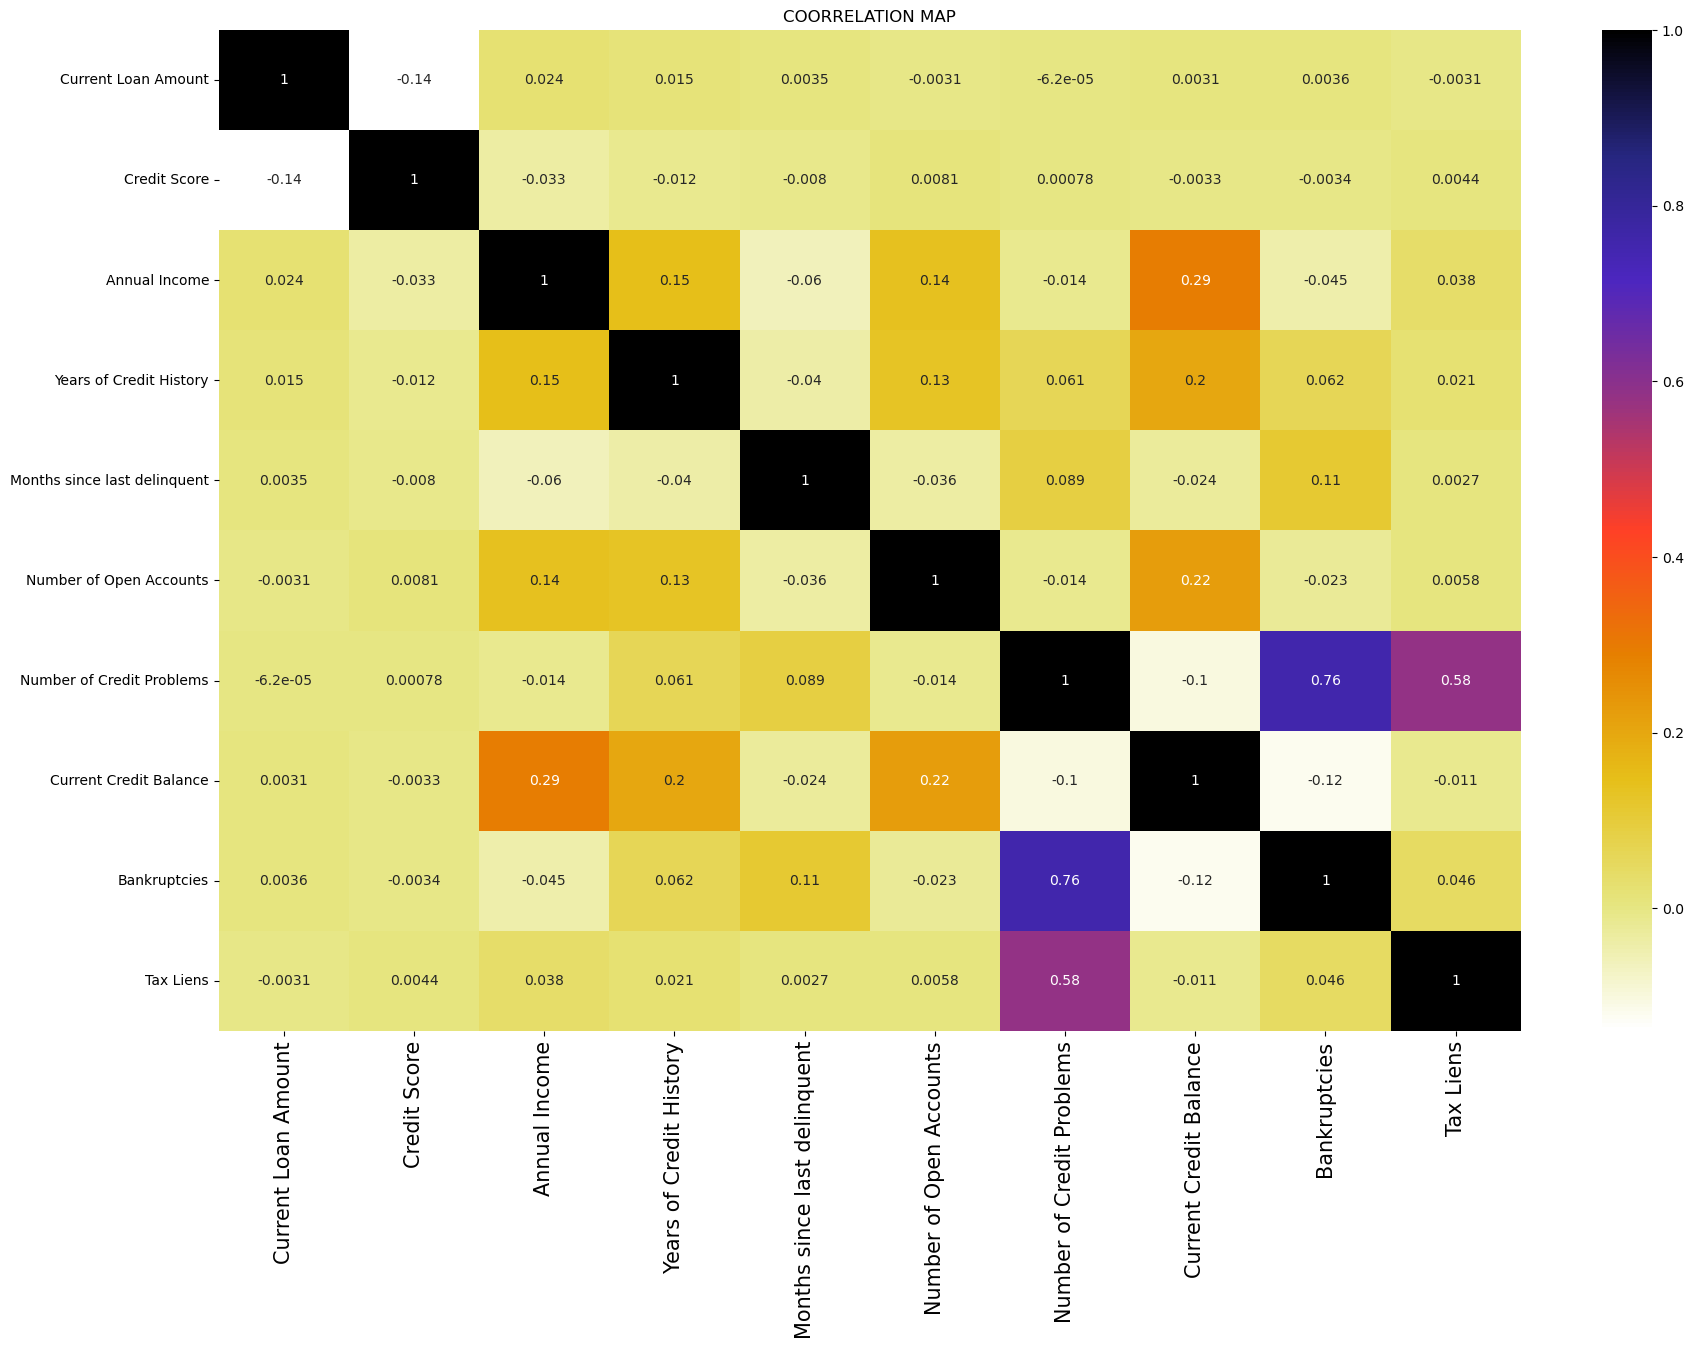

In [7]:
plt.figure(figsize=(21,13))
plt.xticks(rotation=45, size=15)
plt.title("COORRELATION MAP")
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=plt.cm.CMRmap_r);

In [8]:
#sns.pairplot(df, hue="Loan Status", corner=True);

In [9]:
df["Loan Status"].value_counts()

Loan Status
Fully Paid     176191
Charged Off     80793
Name: count, dtype: int64

In [10]:
d = {"Fully Paid":1, "Charged Off":0}
df["Loan Status"] = df["Loan Status"].map(d)
df["Loan Status"].value_counts()

Loan Status
1    176191
0     80793
Name: count, dtype: int64

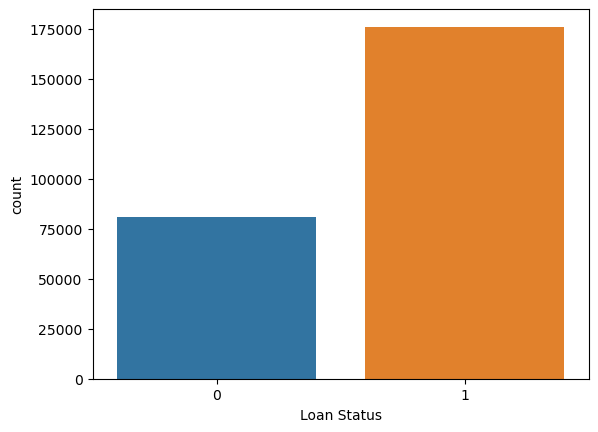

In [11]:
sns.countplot(x=df["Loan Status"]);

In [12]:
abs(df.corr(numeric_only=True)["Loan Status"]).sort_values(ascending=False)

Loan Status                    1.00000
Credit Score                   0.44031
Current Loan Amount            0.26980
Annual Income                  0.07033
Years of Credit History        0.03555
Months since last delinquent   0.02354
Number of Open Accounts        0.02079
Tax Liens                      0.01259
Number of Credit Problems      0.01018
Current Credit Balance         0.00884
Bankruptcies                   0.00115
Name: Loan Status, dtype: float64

## Removing Features that can not affect the model

In [13]:
df = df.drop(["Loan ID","Customer ID"],axis=1)

## Removing Duplicate Rows

In [14]:
df.duplicated().sum()

16610

In [15]:
df = df.drop_duplicates()

## Handling missing values and Feature Engineering

In [16]:
df.isnull().sum()

Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     59346
Years in current job             10444
Home Ownership                       0
Annual Income                    59346
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    131427
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       492
Tax Liens                           23
dtype: int64

In [17]:
# Credit Score
# Credit Score: A value between 0 and 800 indicating the riskiness of the borrowers credit history.
df["Credit Score"].describe().T

count   181028.00000
mean      1236.27408
std       1737.76563
min        585.00000
25%        715.00000
50%        734.00000
75%        744.00000
max       7510.00000
Name: Credit Score, dtype: float64

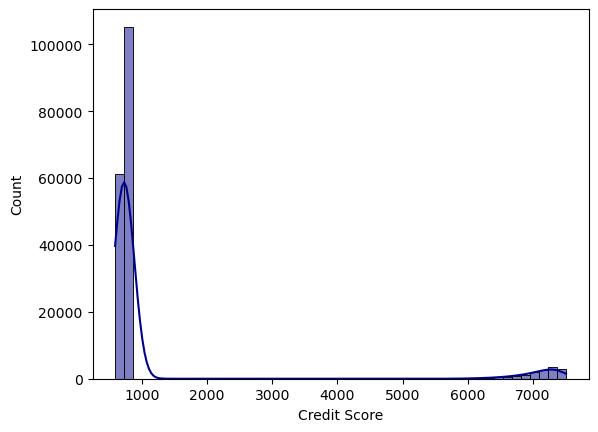

In [18]:
sns.histplot(df["Credit Score"], bins=50, kde=True, color="darkblue");

In [19]:
df.loc[df["Credit Score"] > 800,"Credit Score"] = df["Credit Score"]/10

In [20]:
df["Credit Score"].isnull().sum()

59346

In [21]:
abs(df.corr(numeric_only=True)["Credit Score"]).sort_values(ascending=False)

Credit Score                   1.00000
Loan Status                    0.25704
Years of Credit History        0.08654
Current Loan Amount            0.07159
Number of Credit Problems      0.05892
Months since last delinquent   0.04646
Bankruptcies                   0.04466
Number of Open Accounts        0.04142
Tax Liens                      0.02726
Current Credit Balance         0.01507
Annual Income                  0.01470
Name: Credit Score, dtype: float64

In [22]:
# Credit Score is correlated 25% with Loan Status

In [23]:
df["Credit Score"] = df["Credit Score"].fillna(df.groupby("Loan Status")["Credit Score"].transform("mean"))

In [24]:
df.isnull().sum()

Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job             10444
Home Ownership                       0
Annual Income                    59346
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    131427
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       492
Tax Liens                           23
dtype: int64

In [25]:
# Years in current job

In [26]:
df["Years in current job"].value_counts()

Years in current job
10+ years    73965
2 years      21972
< 1 year     19684
3 years      19337
5 years      16759
1 year       15670
4 years      15138
6 years      13654
7 years      13073
8 years      11417
9 years       9261
Name: count, dtype: int64

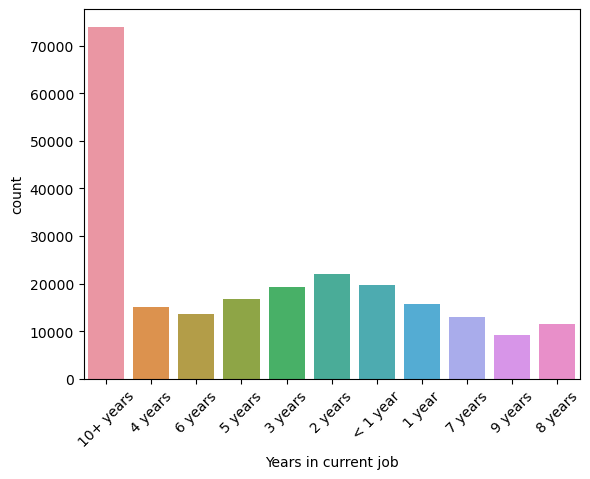

In [27]:
plt.figure()
plt.xticks(rotation=45)
sns.countplot(df,x="Years in current job");

In [28]:
df["Years in current job"]=df["Years in current job"].str.extract("(\d+)")

In [29]:
df["Years in current job"].unique()

array(['10', '4', '6', '5', nan, '3', '2', '1', '7', '9', '8'],
      dtype=object)

In [30]:
df["Years in current job"].fillna("0",inplace=True)

In [31]:
df["Years in current job"].value_counts()

Years in current job
10    73965
1     35354
2     21972
3     19337
5     16759
4     15138
6     13654
7     13073
8     11417
0     10444
9      9261
Name: count, dtype: int64

In [32]:
df["Years in current job"] = df["Years in current job"].astype(int)

In [33]:
# Annual Income

In [34]:
df["Annual Income"].describe().T

count    181028.00000
mean      72400.27260
std       56468.07626
min           0.00000
25%       44555.00000
50%       61505.00000
75%       87057.00000
max     8713547.00000
Name: Annual Income, dtype: float64

<Axes: xlabel='Annual Income'>

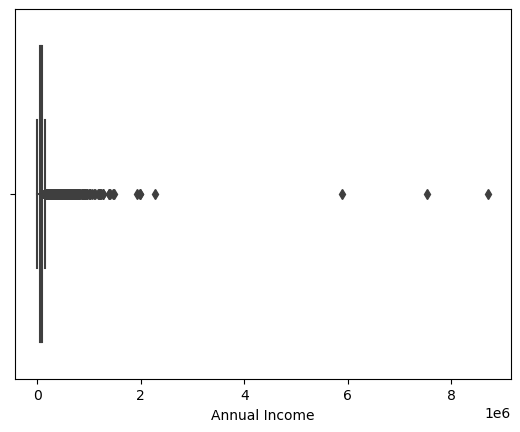

In [35]:
sns.boxplot(x=df["Annual Income"])

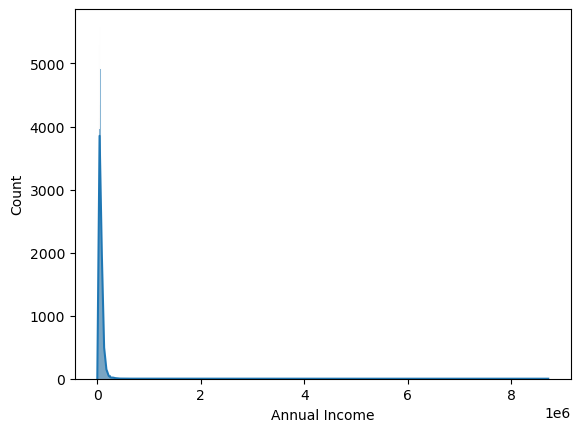

In [36]:
sns.histplot(data=df, x="Annual Income", kde=True);

In [37]:
abs(df.corr(numeric_only=True)["Annual Income"]).sort_values(ascending=False)

Annual Income                  1.00000
Current Credit Balance         0.30730
Years of Credit History        0.15599
Number of Open Accounts        0.14755
Years in current job           0.09872
Loan Status                    0.07035
Months since last delinquent   0.05801
Bankruptcies                   0.04732
Tax Liens                      0.03846
Current Loan Amount            0.02240
Number of Credit Problems      0.01604
Credit Score                   0.01470
Name: Annual Income, dtype: float64

In [38]:

df["Annual Income"] = df["Annual Income"].fillna(df.groupby("Current Credit Balance")["Annual Income"].transform("median"))

In [39]:
knn = KNNImputer()
# The fit_transform method expects a 2D array, so we use double brackets to pass a DataFrame slice
imputed_data = knn.fit_transform(df[['Annual Income']])

# Since the output is a numpy array, we select the first column to replace the original "Credit Score" data
df['Annual Income'] = imputed_data[:, 0]

In [40]:
# Months since last delinquent

In [41]:
df["Months since last delinquent"].describe().T

count   108947.00000
mean        34.93919
std         21.84412
min          0.00000
25%         16.00000
50%         32.00000
75%         51.00000
max        176.00000
Name: Months since last delinquent, dtype: float64

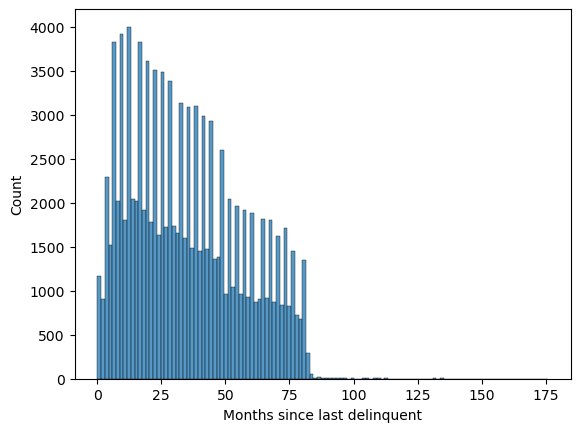

In [42]:
sns.histplot(x=df["Months since last delinquent"]);

In [43]:
abs(df.corr(numeric_only=True)["Months since last delinquent"]).sort_values(ascending=True)

Current Loan Amount            0.00255
Tax Liens                      0.00291
Years in current job           0.01355
Loan Status                    0.02210
Current Credit Balance         0.02442
Number of Open Accounts        0.03532
Years of Credit History        0.03875
Credit Score                   0.04161
Annual Income                  0.05016
Number of Credit Problems      0.08995
Bankruptcies                   0.11392
Months since last delinquent   1.00000
Name: Months since last delinquent, dtype: float64

In [44]:
df["Months since last delinquent"].fillna(df["Months since last delinquent"].median(), inplace=True)


In [45]:
# Bankruptcies

In [46]:
df["Bankruptcies"].value_counts()

Bankruptcies
0.00000    214858
1.00000     23906
2.00000       902
3.00000       168
4.00000        29
5.00000        15
6.00000         3
7.00000         1
Name: count, dtype: int64

In [47]:
df["Bankruptcies"].fillna("0",inplace=True)

In [48]:
df["Bankruptcies"] = df["Bankruptcies"].astype(int)

In [49]:
# Tax Liens 

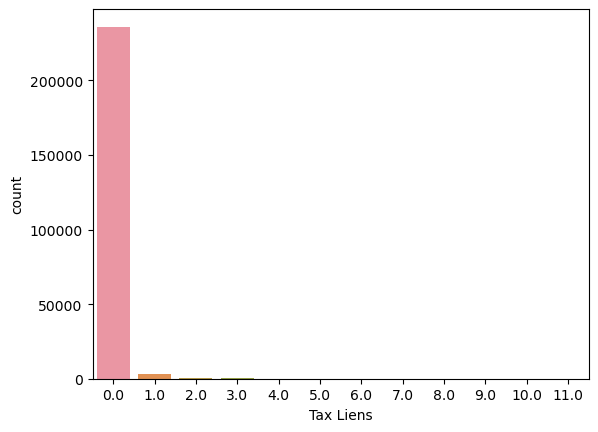

In [50]:
sns.countplot(x=df["Tax Liens"]);

In [51]:
df["Tax Liens"].fillna("0", inplace=True)

In [52]:
df["Tax Liens"] = df["Tax Liens"].astype(int)

In [53]:
# Current Loan Amount

In [54]:
df["Current Loan Amount"].describe().T

count     240374.00000
mean    14659881.83001
std     35353839.16931
min          505.00000
25%         8300.25000
50%        14394.00000
75%        24566.00000
max     99999999.00000
Name: Current Loan Amount, dtype: float64

In [55]:
df["Current Loan Amount"] = df["Current Loan Amount"].replace(99999999,0)

In [56]:
# Purpose

In [57]:
df["Purpose"].value_counts()

Purpose
Debt Consolidation      190656
Home Improvements        14106
other                    13221
Other                     9115
Business Loan             4275
Buy a Car                 3150
Medical Bills             2687
Take a Trip               1467
Buy House                 1445
Educational Expenses       252
Name: count, dtype: int64

In [58]:
df.loc[df["Purpose"] == "Other","Purpose"] = "other"

In [59]:
df["Purpose"].value_counts()

Purpose
Debt Consolidation      190656
other                    22336
Home Improvements        14106
Business Loan             4275
Buy a Car                 3150
Medical Bills             2687
Take a Trip               1467
Buy House                 1445
Educational Expenses       252
Name: count, dtype: int64

In [68]:
# Monthly Debt
df["Monthly Debt"] = df["Monthly Debt"].str.replace("$","").str.replace(",","")

In [69]:
df["Monthly Debt"] = df["Monthly Debt"].astype(float)

In [ ]:
# Maximum Open Credit

In [81]:
df[df["Maximum Open Credit"]=="#VALUE!"]

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
184662,0,1470,Short Term,710.28179,2,Rent,57498.50000,Debt Consolidation,506.34000,15.30000,26.00000,3,0,0,#VALUE!,0,0
184663,0,1470,Short Term,725.00000,2,Rent,39200.00000,Debt Consolidation,506.34000,15.30000,26.00000,3,0,0,#VALUE!,0,0
187512,0,23897,Long Term,697.00000,7,Home Mortgage,49785.00000,Home Improvements,1306.86000,13.00000,32.00000,6,0,0,#VALUE!,0,0
187513,0,23897,Long Term,697.00000,7,Home Mortgage,49785.00000,Home Improvements,1306.86000,13.00000,32.00000,6,0,0,#VALUE!,0,0


In [83]:
df["Maximum Open Credit"] = df["Maximum Open Credit"].replace("#VALUE!",0)

In [84]:
df["Maximum Open Credit"] = df["Maximum Open Credit"].astype(int)

In [87]:
df.to_pickle("loan_prediction_preprocessed.pkl")

In [88]:
abs(df.corr(numeric_only=True)["Loan Status"]).sort_values(ascending=False)

Loan Status                    1.00000
Credit Score                   0.29537
Current Loan Amount            0.18992
Annual Income                  0.05908
Years of Credit History        0.03519
Number of Open Accounts        0.02039
Years in current job           0.01976
Monthly Debt                   0.01518
Months since last delinquent   0.01353
Tax Liens                      0.01252
Number of Credit Problems      0.00911
Current Credit Balance         0.00899
Maximum Open Credit            0.00708
Bankruptcies                   0.00191
Name: Loan Status, dtype: float64

In [190]:
df = pd.read_pickle("loan_prediction_preprocessed.pkl")

## Outlier Analysis

In [191]:
def analyze_outliers(df, columns):
    outlier_summary = []
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        num_outliers = outliers.shape[0]
        
        outlier_summary.append({
            'column': column,
            'num_outliers': num_outliers,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        })
        
        print(f"{column}: {num_outliers} outliers")
        print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}\n")
    
    return pd.DataFrame(outlier_summary)

# Example usage
# Assuming 'df' is your DataFrame and it contains columns named 'age' and 'salary'
outlier_analysis = analyze_outliers(df, ['Current Loan Amount', 'Credit Score','Years in current job','Annual Income','Monthly Debt','Current Credit Balance','Maximum Open Credit'])

print(outlier_analysis)

Current Loan Amount: 3 outliers
Lower bound: -13842.5, Upper bound: 36489.5

Credit Score: 10038 outliers
Lower bound: 667.2044700931004, Upper bound: 782.0773179441397

Years in current job: 0 outliers
Lower bound: -10.0, Upper bound: 22.0

Annual Income: 12860 outliers
Lower bound: -7716.0, Upper bound: 135836.0

Monthly Debt: 8036 outliers
Lower bound: -551.3325000000001, Upper bound: 2332.5675

Current Credit Balance: 12368 outliers
Lower bound: -14069.0, Upper bound: 39347.0

Maximum Open Credit: 13903 outliers
Lower bound: -22502.0, Upper bound: 71746.0

                   column  num_outliers  lower_bound  upper_bound
0     Current Loan Amount             3 -13842.50000  36489.50000
1            Credit Score         10038    667.20447    782.07732
2    Years in current job             0    -10.00000     22.00000
3           Annual Income         12860  -7716.00000 135836.00000
4            Monthly Debt          8036   -551.33250   2332.56750
5  Current Credit Balance         123

In [192]:
df.shape

(240374, 17)

In [193]:
def drop_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Only keep rows in dataframe that do not contain any outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df


df = drop_outliers(df, ['Current Loan Amount', 'Credit Score','Years in current job','Annual Income','Monthly Debt','Current Credit Balance','Maximum Open Credit'])


print(f"New DataFrame shape without outliers: {df.shape}")


New DataFrame shape without outliers: (194348, 17)


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194348 entries, 0 to 256982
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   194348 non-null  int64  
 1   Current Loan Amount           194348 non-null  int64  
 2   Term                          194348 non-null  object 
 3   Credit Score                  194348 non-null  float64
 4   Years in current job          194348 non-null  int32  
 5   Home Ownership                194348 non-null  object 
 6   Annual Income                 194348 non-null  float64
 7   Purpose                       194348 non-null  object 
 8   Monthly Debt                  194348 non-null  float64
 9   Years of Credit History       194348 non-null  float64
 10  Months since last delinquent  194348 non-null  float64
 11  Number of Open Accounts       194348 non-null  int64  
 12  Number of Credit Problems     194348 non-null  in

In [195]:
X = df.drop("Loan Status", axis=1)
y = df[["Loan Status"]]

In [196]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Short Term,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Take a Trip,Purpose_other
0,11520,741.00000,10,33694.00000,584.03000,12.30000,41.00000,10,0,6760,16056,0,0,True,True,False,False,False,False,True,False,False,False,False,False
1,3441,734.00000,4,42269.00000,1106.04000,26.30000,32.00000,17,0,6262,19149,0,0,True,True,False,False,False,False,False,False,False,False,False,True
2,21029,747.00000,10,90126.00000,1321.85000,28.80000,32.00000,5,0,20967,28335,0,0,True,True,False,False,False,False,True,False,False,False,False,False
3,18743,747.00000,10,38072.00000,751.92000,26.20000,32.00000,9,0,22529,43915,0,0,True,False,True,False,False,False,True,False,False,False,False,False
4,11731,746.00000,4,50025.00000,355.18000,11.50000,32.00000,12,0,17391,37081,0,0,True,False,False,True,False,False,True,False,False,False,False,False


## Modelling

In [92]:
setup(df, target="Loan Status")

,Description,Value
0,Session id,3005
1,Target,Loan Status
2,Target type,Binary
3,Original data shape,"(240374, 17)"
4,Transformed data shape,"(240374, 28)"
5,Transformed train set shape,"(168261, 28)"
6,Transformed test set shape,"(72113, 28)"
7,Numeric features,13
8,Categorical features,3
9,Preprocess,True


In [93]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8571,0.0000,0.9447,0.8711,0.9064,0.6057,0.6148,3.5900
rf,Random Forest Classifier,0.8550,0.0000,0.9454,0.8685,0.9053,0.5986,0.6085,5.3210
xgboost,Extreme Gradient Boosting,0.8219,0.0000,0.9366,0.8392,0.8852,0.4939,0.5090,0.6940
lightgbm,Light Gradient Boosting Machine,0.8216,0.0000,0.9434,0.8347,0.8857,0.4857,0.5053,0.7620
gbc,Gradient Boosting Classifier,0.8195,0.0000,0.9470,0.8305,0.8849,0.4745,0.4973,6.8470
ada,Ada Boost Classifier,0.8132,0.0000,0.9233,0.8382,0.8787,0.4764,0.4871,1.8930
dt,Decision Tree Classifier,0.7987,0.0000,0.8469,0.8745,0.8605,0.4994,0.5002,0.5040
lda,Linear Discriminant Analysis,0.7438,0.0000,0.9442,0.7628,0.8438,0.1741,0.2105,0.3520
ridge,Ridge Classifier,0.7428,0.0000,0.9561,0.7569,0.8449,0.1470,0.1912,0.2330
dummy,Dummy Classifier,0.7330,0.0000,1.0000,0.7330,0.8459,0.0000,0.0000,0.2740


In [94]:
best_model = create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8606,0.0000,0.9456,0.8745,0.9087,0.6168,0.6252
1,0.8539,0.0000,0.9441,0.8681,0.9045,0.5958,0.6054
2,0.8572,0.0000,0.9476,0.8694,0.9068,0.6042,0.6146
3,0.8557,0.0000,0.9446,0.8697,0.9056,0.6014,0.6108
4,0.8562,0.0000,0.9449,0.8701,0.9059,0.6028,0.6121
5,0.8607,0.0000,0.9446,0.8752,0.9086,0.6177,0.6257
6,0.8533,0.0000,0.9430,0.8682,0.9041,0.5949,0.6041
7,0.8596,0.0000,0.9463,0.8728,0.9081,0.6128,0.6219
8,0.8578,0.0000,0.9433,0.8730,0.9068,0.6093,0.6175


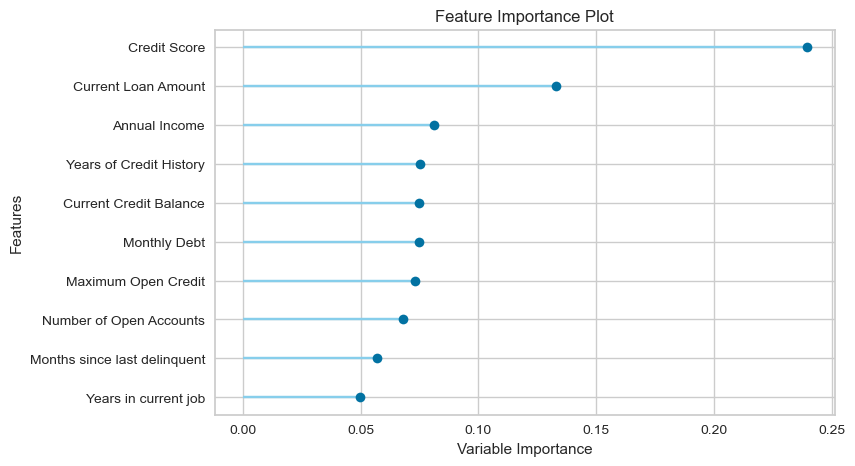

In [95]:
plot_model(best_model, plot="feature")

In [197]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [198]:
et = ExtraTreesClassifier(n_estimators=100, random_state=0)
model = et.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy_score(predictions,y_test)

0.8683186860682899

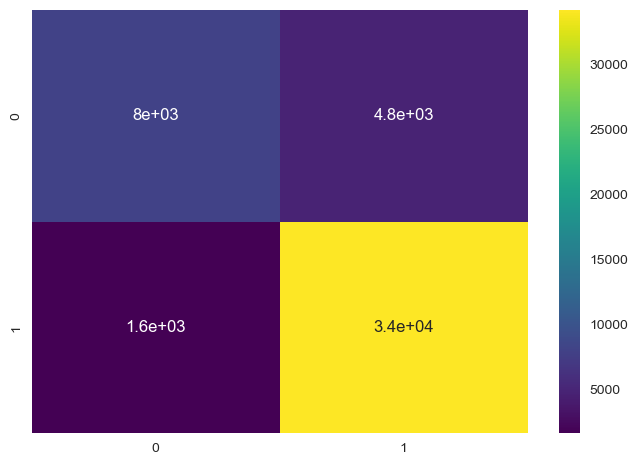

In [199]:
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, cmap='viridis');

In [200]:
confusion_matrix(predictions,y_test)

array([[ 8034,  1618],
       [ 4780, 34155]], dtype=int64)

In [201]:
rf = RandomForestClassifier()
model_rf = rf.fit(x_train, y_train)
predictions_rf = model_rf.predict(x_test)
accuracy_score(predictions,y_test)

0.8683186860682899

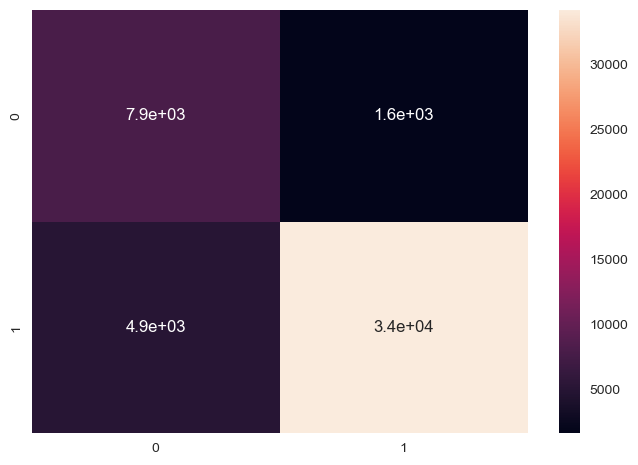

In [202]:
sns.heatmap(confusion_matrix(predictions_rf,y_test), annot=True);

In [203]:
confusion_matrix(predictions_rf,y_test)

array([[ 7874,  1605],
       [ 4940, 34168]], dtype=int64)

In [204]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.63      0.83      0.72      9652
           1       0.95      0.88      0.91     38935

    accuracy                           0.87     48587
   macro avg       0.79      0.85      0.81     48587
weighted avg       0.89      0.87      0.87     48587



## Feature importance

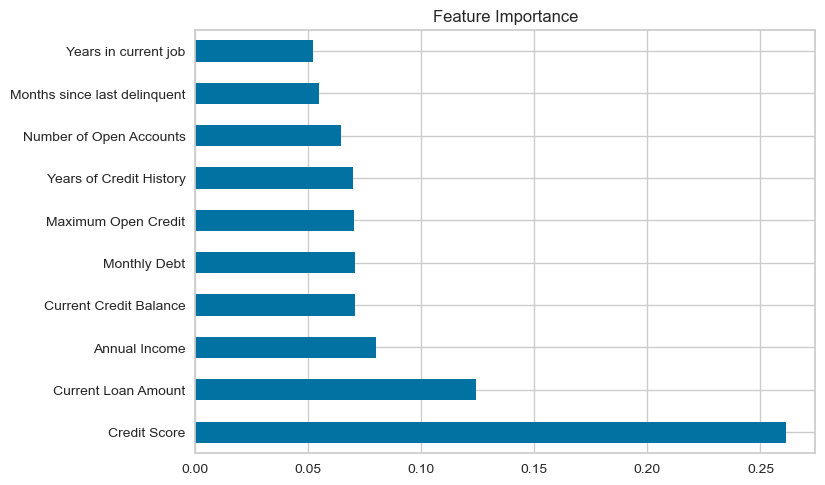

In [207]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')  
plt.title('Feature Importance');
